<a href="https://colab.research.google.com/github/danielarruda1000/geo_visao_comp/blob/main/ime_geo_visao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2

In [ ]:
from google.colab.patches import cv2_imshow

# 1) Função que usa a lib OpenCV para calcular usando produto vetorial
* a) Ponto que é a interseção de duas reta
* b) Reta que passa por dois pontos

In [ ]:
def reta_intesercao(p1, p2):

  reta1 = np.array([p1[0], p1[1], 1])
  reta2 = np.array([p2[0], p2[1], 1])

  L = np.cross(reta1, reta2)

  return L

In [ ]:
def ponto_intesercao(reta1, reta2):

  L = np.cross(reta1, reta2)

  a = L[0]
  b = L[1]
  c = L[2]

  ponto = (a/c, b/c)

  return ponto


In [ ]:
p1, p2 = (0,0), (1,1)
p3, p4 = (0,1), (1,0)

reta1 = reta_intesercao(p1, p2)
reta2 = reta_intesercao(p3, p4)

ponto = ponto_intesercao(reta1, reta2)

In [ ]:
print('Reta 1:', reta1)
print('Reta 2:', reta2)
print('Ponto interseção:', ponto)

Reta 1: [-1  1  0]
Reta 2: [ 1  1 -1]
Ponto interseção: (np.float64(0.5), np.float64(0.5))


# Processar as coordenadas de vertices do paralelepípedo da imgem
* a) Coordenadas dos pontos de fuga
* b) coordenadas em RP3 da reta que liga os pontos de fuga

A) Coordenadas dos pontos de fuga:
   VP esquerdo: (np.float64(65.05555555555556), np.float64(50.111111111111114))
   VP direito:  (np.float64(892.4814814814815), np.float64(40.0))

B) Linha do horizonte (ax + by + c = 0):
   10.111111x + 827.425926y + -42121.016461 = 0


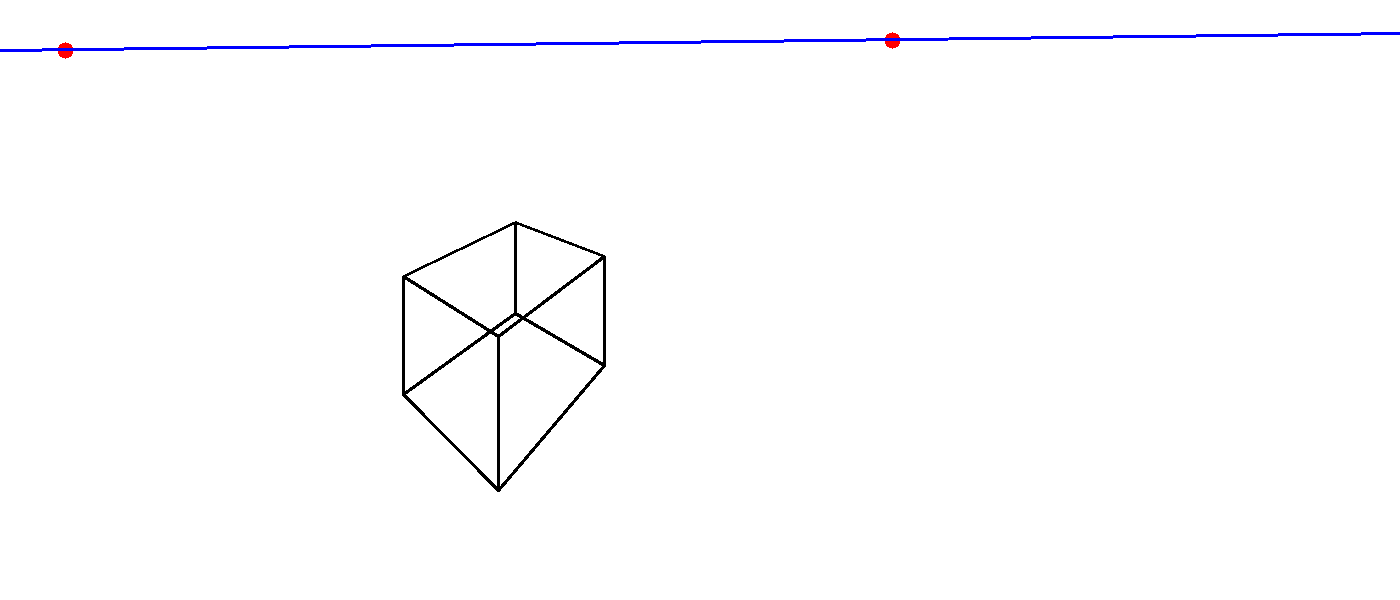

In [ ]:
import numpy as np
import cv2



# ==============================
# Pontos do cubo (coordenadas fornecidas)
# ==============================
A = (403, 276)
B = (515, 222)
C = (604, 256)
D = (498, 336)
E = (403, 394)
F = (498, 490)
G = (604, 365)
H = (515, 313)

# ==============================
# Cálculo dos pontos de fuga
# ==============================
# VP esquerdo: interseção de AB e EF
L1_left = reta_intesercao(C, B)
L2_left = reta_intesercao(H, G)
VP_left = ponto_intesercao(L1_left, L2_left)

# VP direito: interseção de BC e FG
L1_right = reta_intesercao(A,B)
L2_right = reta_intesercao(E,H)
VP_right = ponto_intesercao(L1_right, L2_right)

# Linha do horizonte (reta entre os dois VP)
horizon = reta_intesercao(VP_left, VP_right)

print("A) Coordenadas dos pontos de fuga:")
print("   VP esquerdo:", VP_left)
print("   VP direito: ", VP_right)

print("\nB) Linha do horizonte (ax + by + c = 0):")
print(f"   {horizon[0]:.6f}x + {horizon[1]:.6f}y + {horizon[2]:.6f} = 0")

# ==============================
# Visualização com OpenCV
# ==============================
# Criar imagem branca
img = np.ones((600, 1400, 3), dtype=np.uint8) * 255

# Desenhar cubo (arestas principais)
arestas = [
    (A, B), (B, C), (C, G), (G, F), (F, E), (E, A),  # contorno externo
    (A, D), (D, C), (D, F),   # laterais
    (E, H), (B,H), (G,H)  # linha interna (pontilhada idealmente)
]
for p1, p2 in arestas:
    cv2.line(img, p1, p2, (0, 0, 0), 2)

# Desenhar pontos de fuga
cv2.circle(img, (int(VP_left[0]), int(VP_left[1])), 8, (0, 0, 255), -1)
cv2.circle(img, (int(VP_right[0]), int(VP_right[1])), 8, (0, 0, 255), -1)

# Desenhar linha do horizonte
x0, y0 = 0, int((-horizon[2] - horizon[0]*0) / horizon[1])
x1, y1 = img.shape[1], int((-horizon[2] - horizon[0]*img.shape[1]) / horizon[1])
cv2.line(img, (x0, y0), (x1, y1), (255, 0, 0), 2)

# Mostrar imagem
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()
